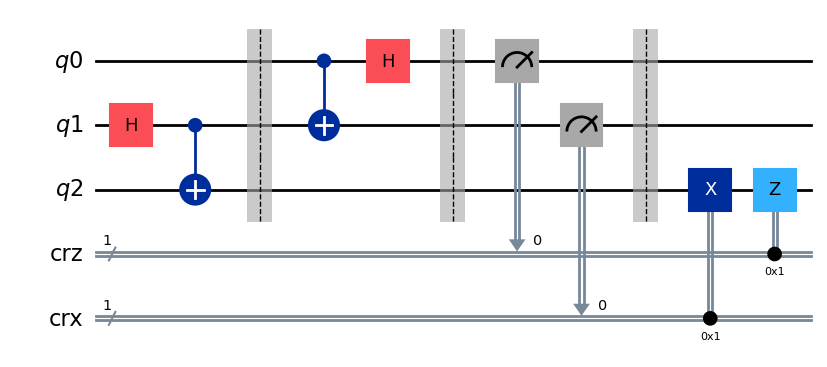

In [1]:
# from qiskit import QuantumRegister, QuantumCircuit, Aer, transpile, assemble
# from qiskit.visualization import plot_histogram
# from qiskit.quantum_info import random_statevector
# from qiskit import *
from qiskit import *#Aer, ClassicalRegister, QuantumCircuit, QuantumRegister

# initialize 3-qubit circuit with named registers
q0 = QuantumRegister(1, name="q0") # Olivia's source qubit to teleport
q1 = QuantumRegister(1, name="q1") # middle qubit sent to Olivia (half of Bell state pair)
q2 = QuantumRegister(1, name="q2") # Barron's destination qubit (half of Bell state pair)

crz = ClassicalRegister(1, name="crz") # Olivia's measurement of her source qubit
crx = ClassicalRegister(1, name="crx") # Olivia's measurement of middle qubit (half of Bell state pair)

circuit = QuantumCircuit(q0, q1, q2, crz, crx)

# initialize Olivia's qubit (quantum state to teleport)
# circuit.x(0)
# circuit.barrier()

# create Bell state pair
circuit.h(q1)
circuit.cx(q1, q2)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(q0, q1)
circuit.h(q0)
circuit.barrier()
circuit.measure(q0, crz)
circuit.measure(q1, crx)
circuit.barrier()

# Barron transforms his qubit based on measurement results
circuit.x(q2).c_if(crx, 1)  # apply X gate if cr_x is 1
circuit.z(q2).c_if(crz, 1)  # apply Z gate if cr_z is 1

circuit.draw(output='mpl')

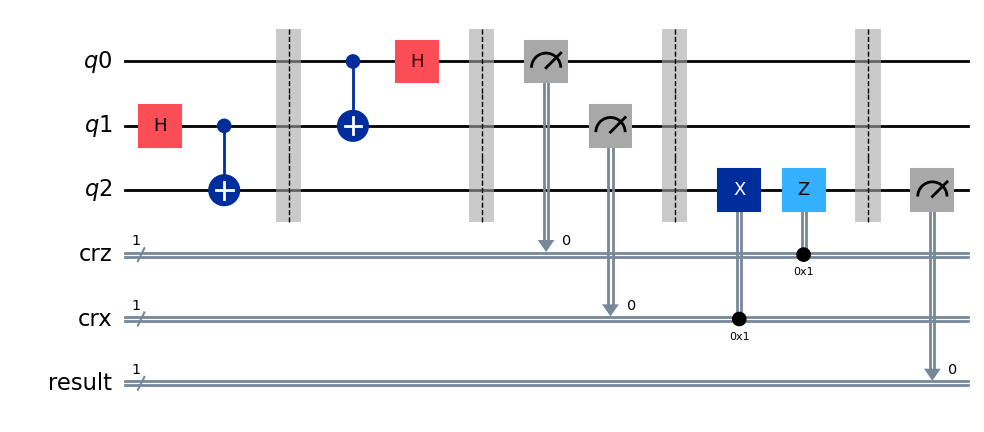

In [2]:
# add final measurement of Barron's qubit
cr_result = ClassicalRegister(1, name="result")
circuit.barrier()
circuit.add_register(cr_result)
circuit.measure(2, 2)
circuit.draw(output='mpl')

In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator

# from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
# transpile our circuit for the selected backend

result = transpile(circuit, backend=simulator, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)